# PROJECT ON AIRLINE PASSENGER SATISFACTION PREDICTION

##  Objective:-
- To Predict the Airline Passenger Satisfaction on the basis of the factors 
  which are responsible for the Passenger Satisfaction

## Content:-

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\test.csv.zip')

In [3]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

### Identifying Null Values 

In [5]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


## Data Cleaning and Preprocessing

In [6]:
# We drop the columns which is not required for our predictions
df.drop(columns=['Unnamed: 0','id','Arrival Delay in Minutes'],inplace=True)

In [7]:
df   

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,satisfied


### Plotting Boxplot for Identifying the outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'Flight Distance'),
  Text(3, 0, 'Inflight wifi service'),
  Text(4, 0, 'Departure/Arrival time convenient'),
  Text(5, 0, 'Ease of Online booking'),
  Text(6, 0, 'Gate location'),
  Text(7, 0, 'Food and drink'),
  Text(8, 0, 'Online boarding'),
  Text(9, 0, 'Seat comfort'),
  Text(10, 0, 'Inflight entertainment'),
  Text(11, 0, 'On-board service'),
  Text(12, 0, 'Leg room service'),
  Text(13, 0, 'Baggage handling'),
  Text(14, 0, 'Checkin service'),
  Text(15, 0, 'Inflight service'),
  Text(16, 0, 'Cleanliness'),
  Text(17, 0, 'Departure Delay in Minutes')])

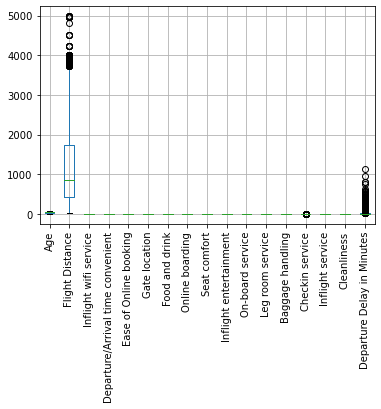

In [8]:
df.boxplot()
plt.xticks(rotation=90)

- Boxplot shows that the we having Outliers in a 'Departure Delay in Minutes' and 'flight Distance'
  

In [9]:
df['Departure Delay in Minutes'].value_counts()

0      14688
1        734
2        581
3        526
4        455
       ...  
333        1
252        1
147        1
360        1
295        1
Name: Departure Delay in Minutes, Length: 313, dtype: int64

<AxesSubplot:xlabel='Departure Delay in Minutes'>

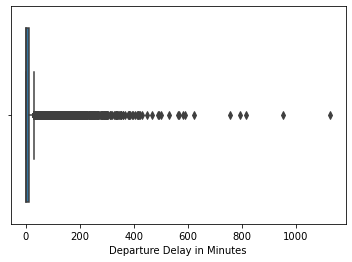

In [10]:
sns.boxplot(df['Departure Delay in Minutes'])

## Visualizations

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

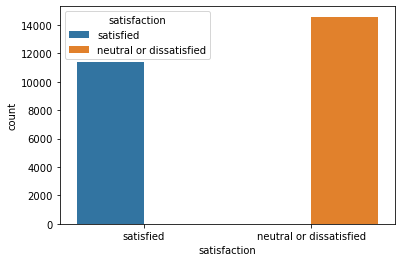

In [11]:
sns.countplot(data=df,x='satisfaction',hue='satisfaction')

- This barplot plot shows that the satisfied customers are lesser as compared to neutral or dissatisfied customers

<AxesSubplot:xlabel='Gender', ylabel='count'>

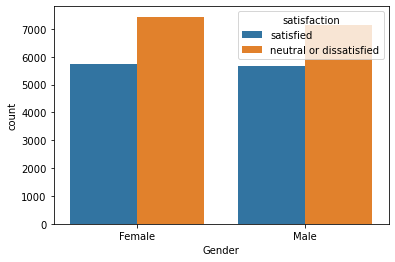

In [12]:
sns.countplot(data=df,x='Gender',hue='satisfaction')

- This graph shows that there is a airline female passengers are more satisfied as compared tol male passengers

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

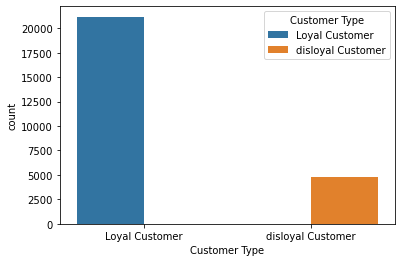

In [13]:
sns.countplot(data=df,x='Customer Type',hue='Customer Type')

- This graph shows that the Loyal customers of the airline are maximum as compared to Disloyal customers

<AxesSubplot:>

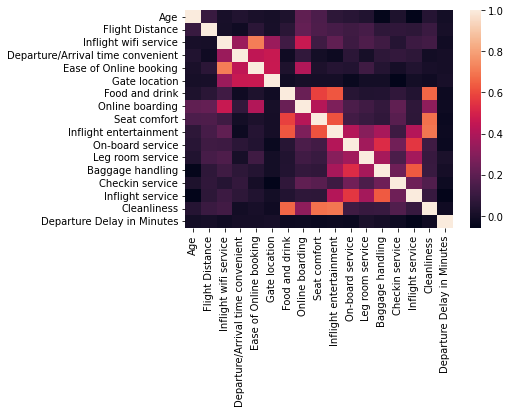

In [14]:
sns.heatmap(df.corr())

- Heatmap shows the correlations between number of features in our dataset
- There is a correlation between Food&Drink-Cleanliness,seat comfort-cleanliness,
  Ease of online booking-inflight wifi service

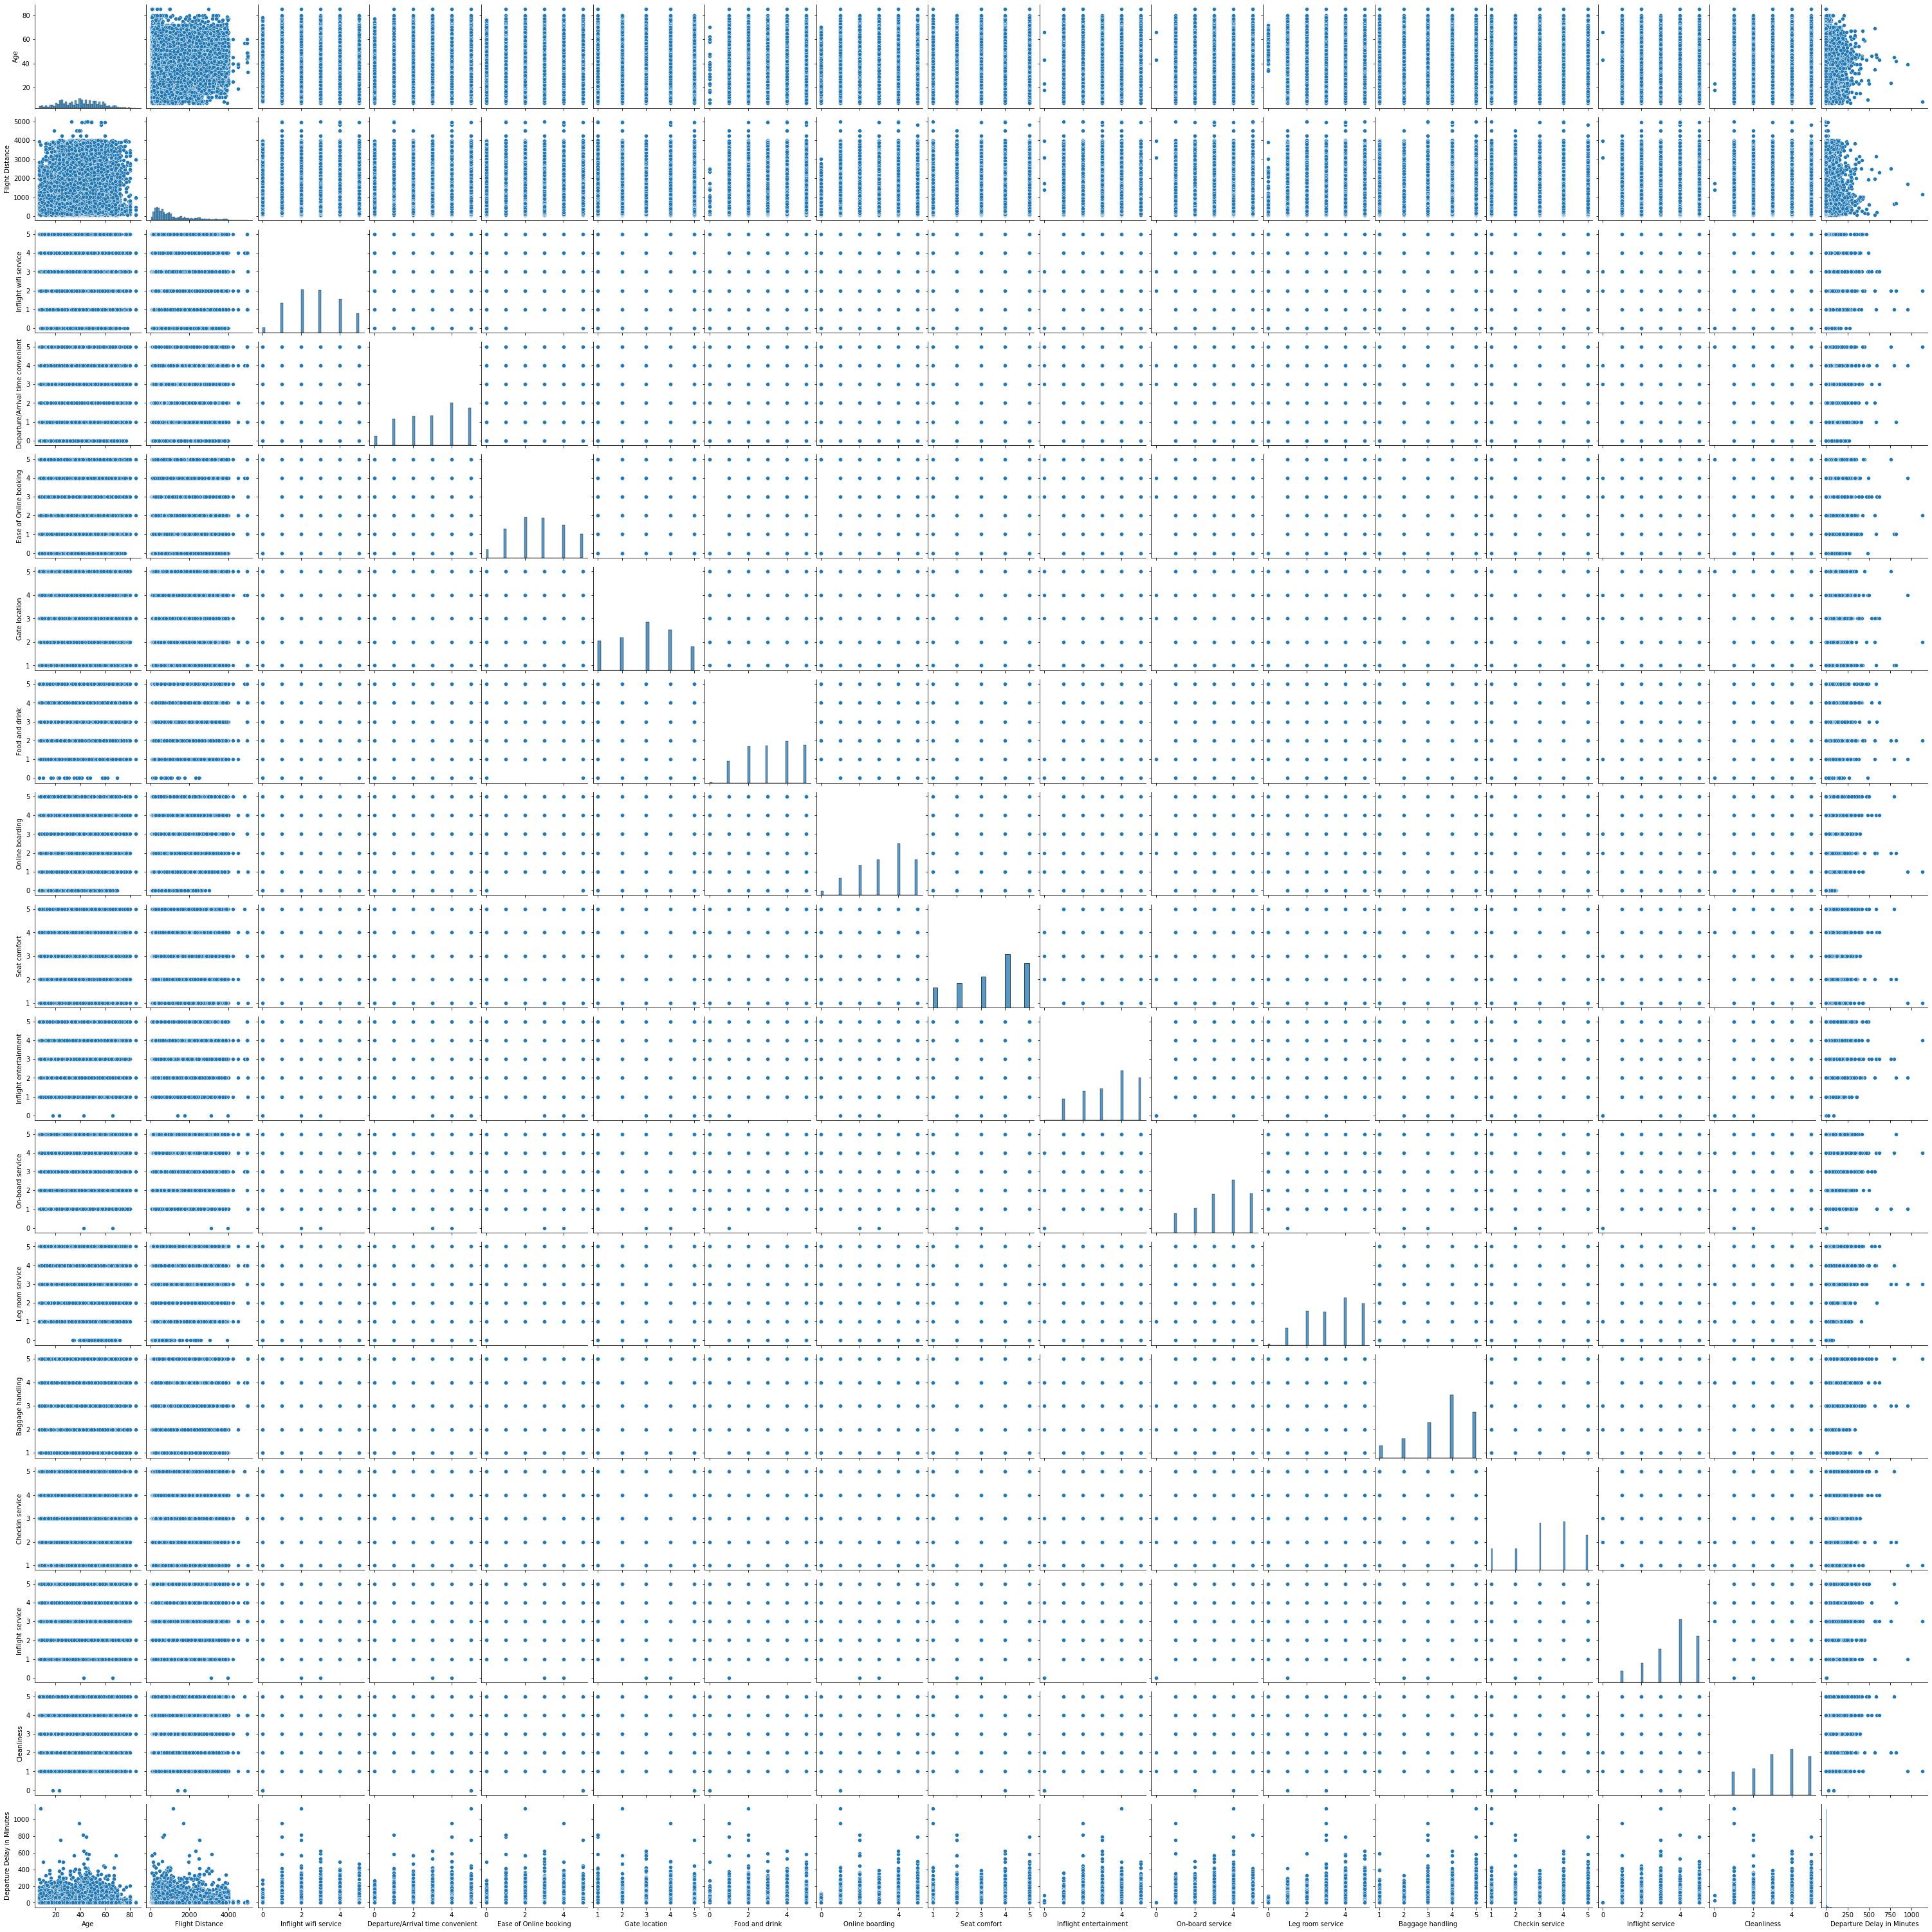

In [15]:
sns.pairplot(df)

In [16]:
df.skew()

Age                                 -0.000088
Flight Distance                      1.102927
Inflight wifi service                0.040792
Departure/Arrival time convenient   -0.324685
Ease of Online booking              -0.020655
Gate location                       -0.055798
Food and drink                      -0.170229
Online boarding                     -0.469218
Seat comfort                        -0.498047
Inflight entertainment              -0.371353
On-board service                    -0.426507
Leg room service                    -0.341210
Baggage handling                    -0.678863
Checkin service                     -0.373016
Inflight service                    -0.696803
Cleanliness                         -0.304285
Departure Delay in Minutes           7.193970
dtype: float64

## Use Ordinal Encoder to convert the categorical data to numeric data

In [17]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols = ['Gender','Customer Type','Type of Travel','Class','satisfaction']
oe=OrdinalEncoder()
df[cat_cols]=oe.fit_transform(df[cat_cols])
df[cat_cols]

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
25971,1.0,1.0,0.0,0.0,0.0
25972,1.0,0.0,0.0,0.0,1.0
25973,0.0,0.0,1.0,1.0,0.0
25974,1.0,0.0,0.0,0.0,1.0


## Splitting Features and Targets

In [18]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
x

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,0.0,0.0,52,0.0,1.0,160,5,4,3,4,...,4,3,5,5,5,5,2,5,5,50
1,0.0,0.0,36,0.0,0.0,2863,1,1,3,1,...,4,5,4,4,4,4,3,4,5,0
2,1.0,1.0,20,0.0,1.0,192,2,0,2,4,...,2,2,2,4,1,3,2,2,2,0
3,1.0,0.0,44,0.0,0.0,3377,0,0,0,2,...,4,4,1,1,1,1,3,1,4,0
4,0.0,0.0,49,0.0,1.0,1182,2,3,4,3,...,1,2,2,2,2,2,4,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1.0,1.0,34,0.0,0.0,526,3,3,3,1,...,3,4,4,3,2,4,4,5,4,0
25972,1.0,0.0,23,0.0,0.0,646,4,4,4,4,...,4,4,4,4,5,5,5,5,4,0
25973,0.0,0.0,17,1.0,1.0,828,2,5,1,5,...,1,2,2,4,3,4,5,4,2,0
25974,1.0,0.0,14,0.0,0.0,1127,3,3,3,3,...,4,4,4,3,2,5,4,5,4,0


In [20]:
y

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
25971    0.0
25972    1.0
25973    0.0
25974    1.0
25975    0.0
Name: satisfaction, Length: 25976, dtype: float64

## Splitting of the Training and Testing Data

In [21]:
y.value_counts()

0.0    14573
1.0    11403
Name: satisfaction, dtype: int64

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=2023)

## Use Standardscaler to convert our data into same unit

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrains = ss.fit_transform(xtrain)
xtests = ss.fit_transform(xtest)

## Model Evaluation

## Using a KNN Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrains,ytrain)
ypred=knn.predict(xtests)

train = knn.score(xtrains,ytrain)
test = knn.score(xtests,ytest)
print(f"Training Score: {train}\n Testing Score: {test}")
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))


Training Score: 0.9414288071275367
 Testing Score: 0.9206980623636597
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      4419
         1.0       0.94      0.87      0.91      3374

    accuracy                           0.92      7793
   macro avg       0.92      0.92      0.92      7793
weighted avg       0.92      0.92      0.92      7793



In [25]:
ypredprob1=knn.predict_proba(xtests)

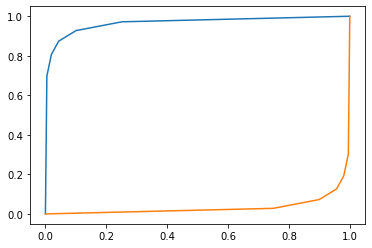

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_curve(ytest,ypred)
fpr,tpr,threshold=roc_curve(ytest,ypredprob1[:,1])
fpr1,tpr1,threshold=roc_curve(ytest,ypredprob1[:,0])
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1)
plt.show()


## Hyperparameter Tuning

In [27]:
parameters = {
    'n_neighbors':list(range(1,31))
}

In [28]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(),parameters,verbose=1)
grid.fit(xtrains,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             verbose=1)

In [29]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)

## Model after Hyperparameter Tunning

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=7)
knn1.fit(xtrains,ytrain)
ypred=knn1.predict(xtests)

train = knn1.score(xtrains,ytrain)
test = knn1.score(xtests,ytest)
print(f"Training Score: {train}\n Testing Score: {test}")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))


Training Score: 0.9359291646043008
 Testing Score: 0.921083023225972
[[4235  184]
 [ 431 2943]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      4419
         1.0       0.94      0.87      0.91      3374

    accuracy                           0.92      7793
   macro avg       0.92      0.92      0.92      7793
weighted avg       0.92      0.92      0.92      7793



In [31]:
ypredprob2=knn1.predict_proba(xtests)

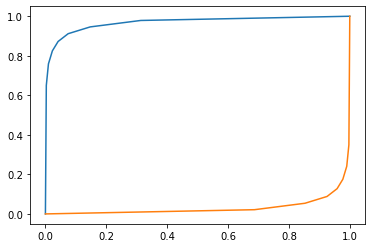

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_curve(ytest,ypred)
fpr,tpr,threshold=roc_curve(ytest,ypredprob2[:,1])
fpr1,tpr1,threshold=roc_curve(ytest,ypredprob2[:,0])
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1)
plt.show()


- We use a KNN model for prediction
- This model giving us a Training Sore of 0.9414 and Testing Score of 0.9206 (model is overfitting)
-  But after Hyperparameter Tuning we get Training Sore of 0.9359 and Testing Score of 0.9210 (Overfitting can be reduced)
-  Hyperparameter Tuning is responsible for improving our model performance.
  

## Summary

- Dataset is obtained from the kaggle which includes the results of the Airline passenger Satisfaction
- This data includes 23 features(columns) and  25976 records(rows)
- we check for the null values we found that the column "Arrival Delay in Minutes" having a 83 null values we cant fill 
  this column with any central tendency(Mean,Median,Mode) because if we fill it then it can affects the model performance and it cant match with
  previous values so that it can't able to give the good results.
- After that we made some visualizations 
- We have some categorical columns in our dataset machine cant able to understand it so we convert it into numeric with the help of 
  Ordinal Encoder
- Splitting the features and target
- Splitting training(70%) and testing data(30%)
- We use StandardScaler to convert our data into same unit(which converts all values in between (o to 1) or if values are negative converts it into(-1 to 1) range)
- Then we moves towards model evaluation we take knn classification model as a basemodel for our classification problem
  previously it gives us overfitting problem which we found with the help of the training & testing score so to overcomes
  this problem we use Gridsearchcv and found best parameter which solving our overfitting problem and giving optimum values
  for both testing and training score
- Model gives us the Accuracy of 0.92
